This notebook try some way to make feature from clock record

In [12]:
#PACKAGE
import os
import pandas as pd
import re
import matplotlib.pyplot as plt


In [6]:
db = pd.read_csv('Filter_CSV/180+2/chunk_1.csv')
db.head(1)

,Event,Site,Date,Round,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,MovesProcessed,Clock
0,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/wTFwL1r4,2024.08.01,-,BlinkyGaladrigal,Denisov27,1/2-1/2,2024.08.01,00:00:10,1967,2015,NaN,NaN,A10,English Opening: Anglo-Scandinavian Defense,180+2,Normal,1. c4 1... d5 2. cxd5 2... Qxd5 3. Nc3 3... Qd...,1. 0:03:00 1... 0:03:00 2. 0:03:00 2... 0:03:0...


In [83]:
data = db["Clock"].iloc[5]

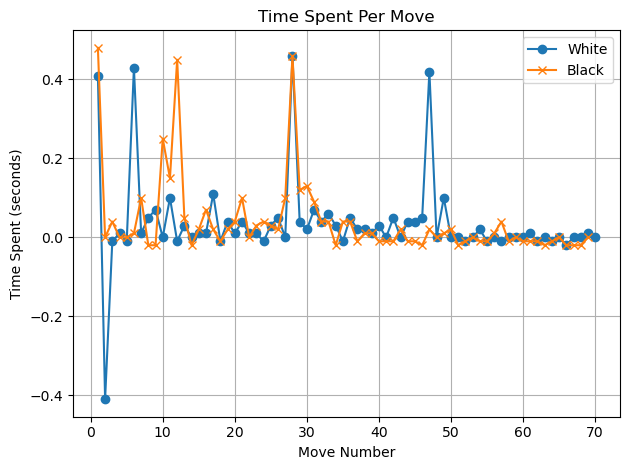

In [85]:
# Use regex to find all (move_number, clock_time) pairs for white and black
white_moves = re.findall(r'(\d+)\. (\d+:\d+:\d+)', data)
black_moves = re.findall(r'(\d+)\.\.\. (\d+:\d+:\d+)', data)

def parse_time(timestr):
    m, s, ms = map(int, timestr.split(':'))
    return m * 60 + s + ms / 100.0

# Convert to cumulative time spent per move
white_times = [parse_time(t) for _, t in white_moves]
black_times = [parse_time(t) for _, t in black_moves]

# Compute time spent on each move
white_spent = [white_times[i] - white_times[i+1] for i in range(len(white_times)-1)]
black_spent = [black_times[i] - black_times[i+1] for i in range(len(black_times)-1)]

# Add last zero time to match the number of moves
white_spent.append(white_times[-1] - white_times[-1])  # or 0
black_spent.append(black_times[-1] - black_times[-1])  # or 0

# Plotting
plt.plot(range(1, len(white_spent)+1), white_spent, label="White", marker='o')
plt.plot(range(1, len(black_spent)+1), black_spent, label="Black", marker='x')
plt.xlabel("Move Number")
plt.ylabel("Time Spent (seconds)")
plt.title("Time Spent Per Move")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

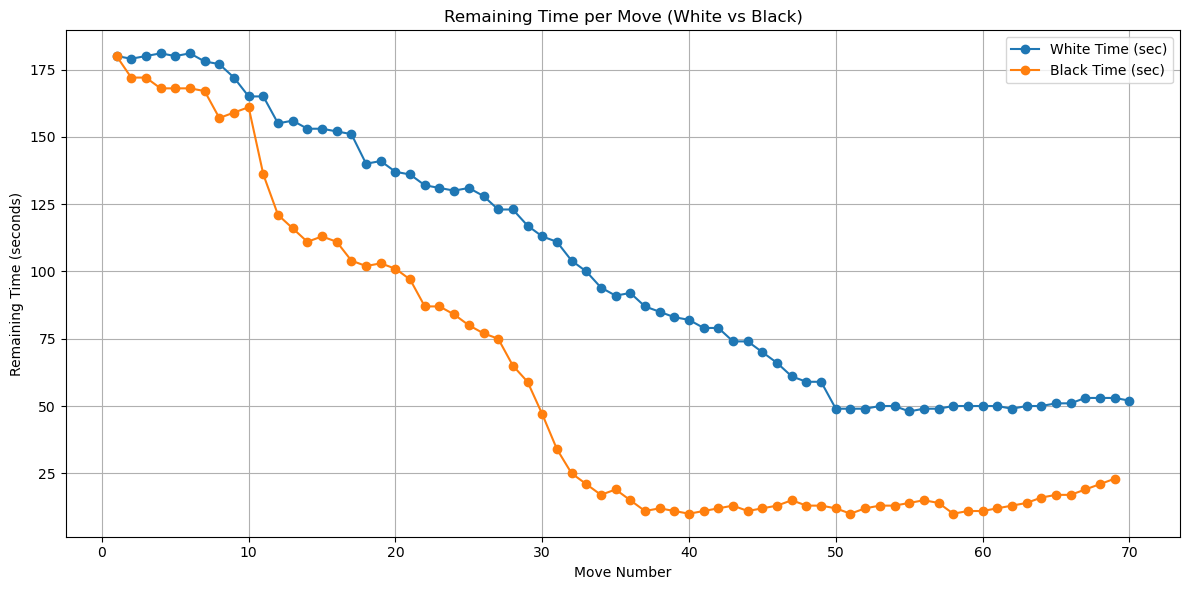

In [87]:
import re
import matplotlib.pyplot as plt

# 請將這裡的字串換成你的完整 Clock 資料
raw_clock_data = db["Clock"].iloc[5]

# 用正則表達式抓取資料：像是 "1. 0:03:00" 與 "1... 0:03:00"
pattern = re.findall(r'(\d+)\. (\d+:\d+:\d+)|(\d+)\.\.\. (\d+:\d+:\d+)', raw_clock_data)

white_times = []
black_times = []
moves = []

for p in pattern:
    if p[0] != '':
        move = int(p[0])
        time_str = p[1]
        moves.append(move)
        h, m, s = map(int, time_str.split(":"))
        total_seconds = h * 3600 + m * 60 + s
        white_times.append(total_seconds)
    elif p[2] != '':
        move = int(p[2])
        time_str = p[3]
        h, m, s = map(int, time_str.split(":"))
        total_seconds = h * 3600 + m * 60 + s
        black_times.append(total_seconds)

# 為了對齊步數
white_moves = list(range(1, len(white_times) + 1))
black_moves = list(range(1, len(black_times) + 1))

# 畫圖
plt.figure(figsize=(12, 6))
plt.plot(white_moves, white_times, label='White Time (sec)', marker='o')
plt.plot(black_moves, black_times, label='Black Time (sec)', marker='o')
plt.xlabel('Move Number')
plt.ylabel('Remaining Time (seconds)')
plt.title('Remaining Time per Move (White vs Black)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
